In [1]:
import numpy as np
import tables
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import os
import pickle
import json
from utils import *

Initializing Parameters...


In [2]:
f_dir = "gamma_inout_reinit_model"
rep = 0
lr = 0.02

In [3]:
with open(os.path.join(f_dir, "init_weight_%d_lr%f.pth" % (rep, lr)), "rb") as f:
        all_weights = np.load(f, allow_pickle=True)
all_weights = all_weights.item()
all_weights.keys()

dict_keys(['in_mask_init', 'rnn_mask_init', 'out_mask_init', 'w_in0', 'w_rnn0', 'w_out0', 'b_rnn0', 'b_out0'])

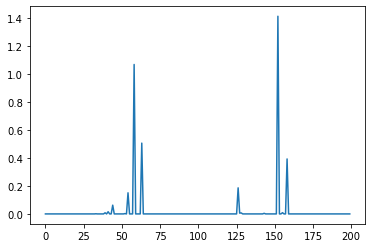

In [4]:
w_out = all_weights['w_out0']
out_mask = all_weights['out_mask_init']
plt.plot(np.sum(w_out, axis=1))

In [5]:
conn_idx_c0 = np.where(out_mask[:, 0])[0]
conn_idx_c1 = np.where(out_mask[:, 1])[0]
conn_idx_c0, conn_idx_c1

(array([33, 36, 39, 41, 42, 44, 46, 49, 52, 54, 56, 58, 59, 63, 64, 69, 75,
        77, 79]),
 array([122, 123, 126, 127, 128, 129, 132, 133, 134, 136, 138, 141, 142,
        143, 144, 152, 154, 155, 158]))

In [6]:
w_in = all_weights['w_in0']
in_mask = all_weights['in_mask_init']
conn_idx_m1 = np.where(out_mask)[0]
conn_idx_m2 = np.where(out_mask)[0]

/Users/xuanyuwu/opt/anaconda3/envs/brainpy_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/xuanyuwu/opt/anaconda3/envs/brainpy_env/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/xuanyuwu/opt/anaconda3/envs/brainpy_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/xuanyuwu/opt/anaconda3/envs/brainpy_env/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/xuanyuwu/opt/anaconda3/envs/brainpy_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/xuanyuwu/opt/anaconda3/envs/brainpy_env/

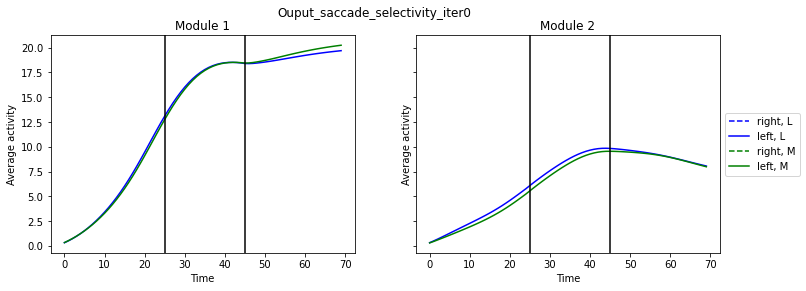

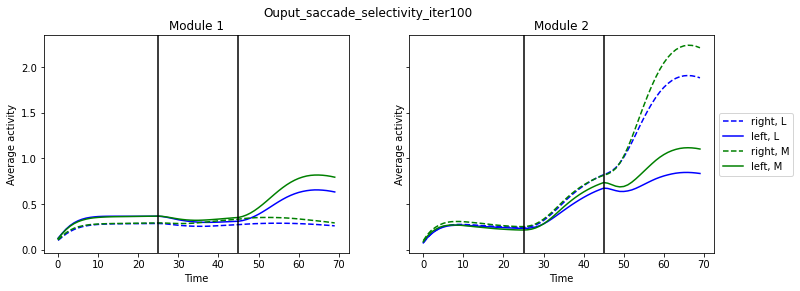

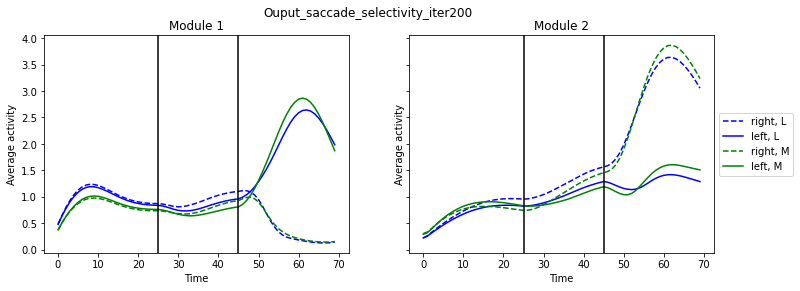

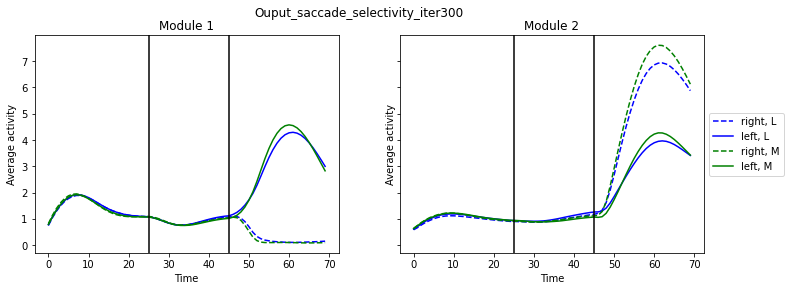

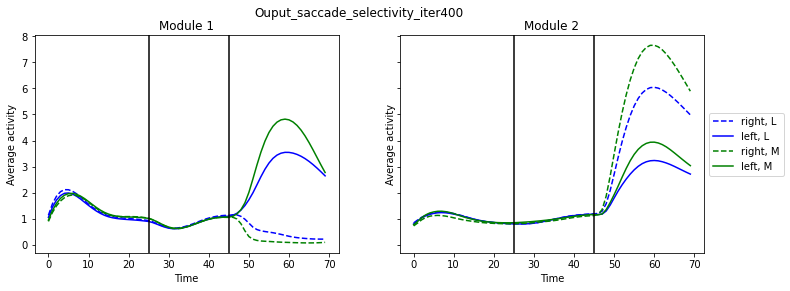

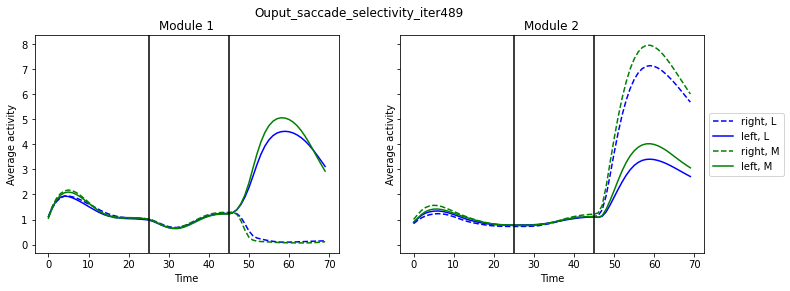

In [12]:
from plot_out_act import plot_output_sac_selectivity

train_output = tables.open_file(
    os.path.join(f_dir, "train_output_lr%f_rep%d.h5" % (lr, rep)), mode="r"
)
train_table = train_output.root

all_iters = []
for row in train_table:
    iter_num = int(row.name.split("iter")[1])
    if iter_num not in all_iters:
        all_iters.append(iter_num)
    else:
        break


for iter_num in all_iters:
    y_iter0 = train_table['y_hist_iter%d'%iter_num][:]
    desired_out_iter0 = train_table["target_iter%d"%iter_num][:]
    stim_level_iter0 = train_table["stim_level_iter%d"%iter_num][:]
    stim_dir_iter0 = train_table["stim_dir_iter%d"%iter_num][:]
    desired_out_iter0, stim_dir_iter0 = correct_zero_coh(y_iter0, stim_level_iter0, stim_dir_iter0, desired_out_iter0)
    plot_output_sac_selectivity(y_iter0, desired_out_iter0, stim_level_iter0, 'Ouput_saccade_selectivity_iter%d'%(iter_num), False)

In [20]:
all_w_rnn = {}
for iter_num in all_iters:
    all_w_rnn[iter_num] = train_table['w_rnn_iter%d'%iter_num][:]


In [26]:
iter0_c0_rnn_conn = all_w_rnn[0][:, conn_idx_c0]
iter0_c1_rnn_conn = all_w_rnn[0][:, conn_idx_c1]


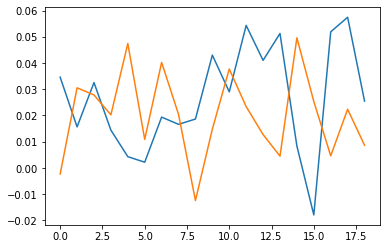

In [28]:
c0_mean = np.mean(iter0_c0_rnn_conn, axis=0)
c1_mean = np.mean(iter0_c1_rnn_conn, axis=0)
plt.plot(c0_mean)
plt.plot(c1_mean)